### Digit

In [24]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import pprint
%config IPCompleter.greedy=True

In [3]:
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


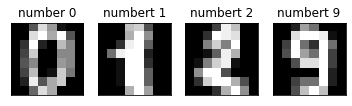

In [5]:
#  画像の表示
# number 0
plt.subplot(141), plt.imshow(digits.images[0], cmap = 'gray')
plt.title('number 0'), plt.xticks([]), plt.yticks([])

# number 1
plt.subplot(142), plt.imshow(digits.images[1], cmap = 'gray')
plt.title('numbert 1'), plt.xticks([]), plt.yticks([])

# number 2
plt.subplot(143), plt.imshow(digits.images[2], cmap = 'gray')
plt.title('numbert 2'), plt.xticks([]), plt.yticks([])

# number 9
plt.subplot(144), plt.imshow(digits.images[-2], cmap = 'gray')
plt.title('numbert 9'), plt.xticks([]), plt.yticks([])

plt.show()

In [21]:
# Digitsデータセットのロード
digits = datasets.load_digits()

print(len(digits.data))
print(len(digits.images))
print(len(digits.target))
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)

1797
1797
1797
(1797, 64)
(1797, 8, 8)
(1797,)


In [25]:
pprint.pprint(digits.images)

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [41]:
n_samples = len(digits.images)
print(n_samples)
X = digits.images.reshape((n_samples, -1))
print(X.shape)
print(type(X))
pprint.pprint(X)

1797
(1797, 64)
<class 'numpy.ndarray'>
array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])


In [30]:
y = digits.target
print(X.shape)
print(y)
print(y.shape)

(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [34]:
# データセットを訓練用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# 交差検定によってパラメータを設定
tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
 
scores = ['precision', 'recall']
for score in scores:
    print("# ハイパーパラメータの調整: %s" % score)
    print()
 
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
 
    print("最良のパラメータセット:")
    print()
    print(clf.best_params_)
    print()
    print("グリッドスコア: %s" % score)
    print()
 
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("詳細レポート:")
    print()
    print("学習データでモデルを作成")
    print("テストデータの評価スコアを作成")
    print()
 
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# ハイパーパラメータの調整: precision

最良のパラメータセット:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

グリッドスコア: precision

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

詳細レポート:

学習データでモデルを作成
テストデータの評価スコアを作成

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0

In [46]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
%matplotlib inline

# mnistデータセットの読み込み
mnist = load_digits()
x = mnist.data
y = mnist.target
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [47]:
print(type(x))
print(x.shape)
print(type(y))
print(y.shape)
pprint.pprint(x)
pprint.pprint(y)

<class 'torch.Tensor'>
torch.Size([1797, 64])
<class 'torch.Tensor'>
torch.Size([1797])
tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
        [ 0.,  0.,  2.,  ..., 12.,  0.,  0.],
        [ 0.,  0., 10.,  ..., 12.,  1.,  0.]])
tensor([0, 1, 2,  ..., 8, 9, 8])


In [48]:
# モデルの生成
net = nn.Linear(in_features=x.size()[1], out_features=10, bias=True)

# オプティマイザの生成
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失関数の生成 
loss_fn = nn.CrossEntropyLoss()

In [49]:
losses = []

for epoc in range(100):
   # 前回のbackwardで計算した勾配の削除
   optimizer.zero_grad()

   # 予測値の計算
   y_pred = net(x)

   # 損失関数の計算
   loss = loss_fn(y_pred, y)

   # 微分の計算
   loss.backward()

   # パラメータの更新
   optimizer.step()

   # 収束確認のため損失を保持
   losses.append(loss.item())

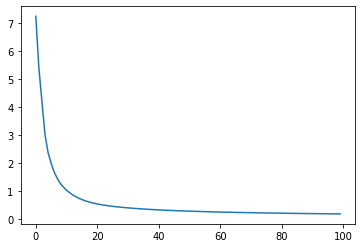

In [50]:
# グラフのプロット
plt.plot(losses)

In [51]:
# 予測
h = net(x)
_, y_pred = torch.max(h, 1) # 0〜9

# 予測の正解率
(y_pred == y).sum().item() / len(y)

0.9476905954368392